In [1]:
using CairoMakie, Statistics, KernelDensity

function order(X,R,step)
    c = zeros(Int(ceil(1.0/step)))
    cnt = zeros(size(c))
    y = 0.0
    n = 1
    while y <= 1.0
        for i in 1:size(X,1)
            if y <= X[i,2] <= y+step
                c[n] += R[i]
                cnt[n] += 1
            end
        end
        n += 1
        y += step
    end
    return replace(c./cnt,NaN=>0.0)
end

order (generic function with 1 method)

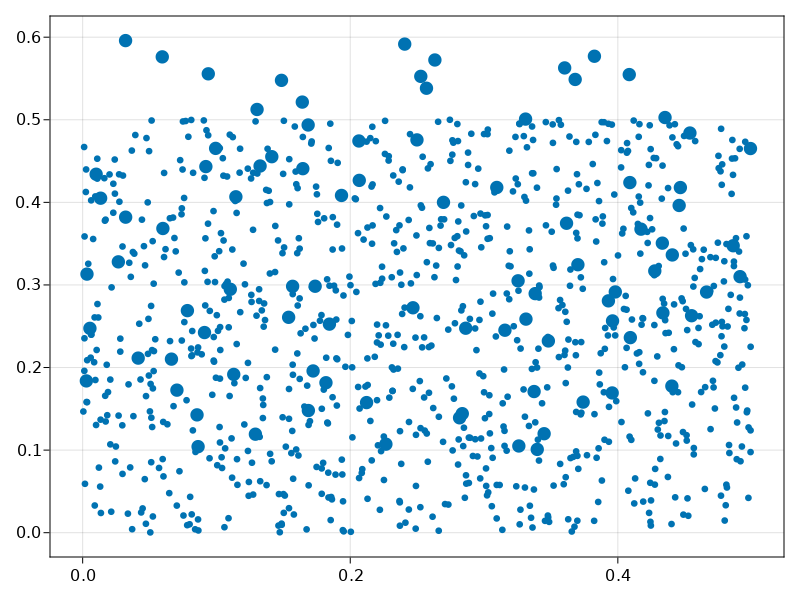

In [284]:
N = 1024

r = 0.005

R = zeros(N)
X = zeros(N,2)
for i in 1:N
    if (rand() < 0.1)
        R[i] = 2*r
    else
        R[i] = r
    end
    if (R[i] == r)
        X[i,1] = rand()*0.5
        X[i,2] = rand()*0.5
    else
        X[i,1] = rand()*0.5
        X[i,2] = rand()*0.5+0.1
    end
end

#X = rand(N,2)

fig = Figure()
ax = Axis(fig[1,1])
p = [Point2f0(X[i,1],X[i,2]) for i in 1:N]
scatter!(ax,p,markersize=R,markerspace=SceneSpace)
fig

In [285]:
function σ(X,R,rl,rs,Ly=1.0)
    step = rl
    c = zeros(Int(floor(1.0/step)))
    nl = sum(R.==rl)
    ns = sum(R.==rs)
    
    μ = nl/(nl+ns)
    
    @show μ
    
    @show nl, ns
    
    y = 0.0
    sigma = 0.0
    A = 0.0
    while y < Ly
        l = 0
        s = 0
        for i in 1:size(X,1)
            if y <= X[i,2] <= y+step
                R[i] == rl ? l += 1 : s += 1
            end
        end
        if (l == 0 && s == 0)
            y += step
            continue
        end
        fi = l / (l+s)
        Ai = l+s
        sigma += Ai*(fi-μ)^2
        A += Ai
        y += step
    end
    return (sigma / A) / μ
end

σ(X,R,2*r,r)

μ = 0.08984375
(nl, ns) = (92, 932)


0.19048437998458262

In [267]:
104/920

0.11304347826086956

In [187]:
function kd(x,s::Vector{Float64},h)
    K = (x) -> exp(-x^2 / 2.0) / sqrt(2*π)
    y = zeros(length(x))
    for (i,p) in enumerate(x)
        yp = 0.0
        for xi in s
            yp += K((p-xi)/h) 
        end
        y[i] = yp / (length(s)*h)
    end
    return y
end

kd (generic function with 2 methods)

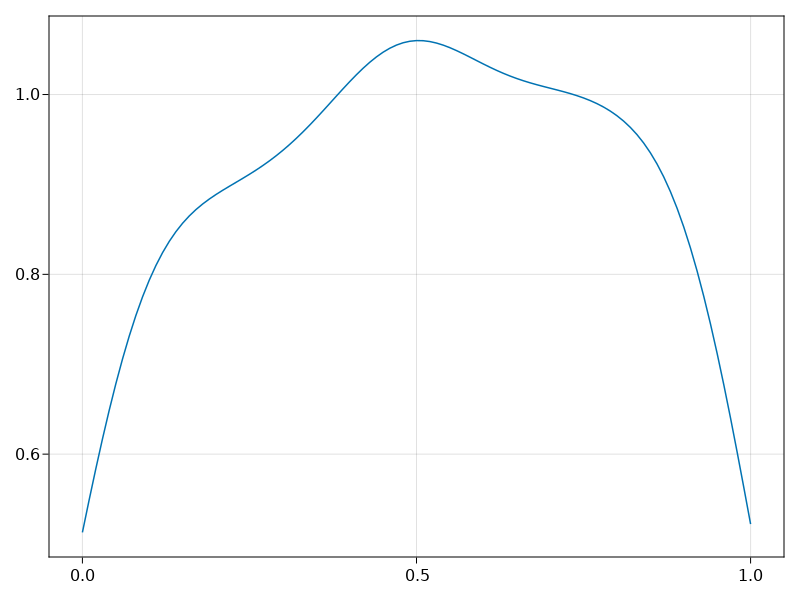

In [188]:
y=rand(1000)
k = kd(collect(0:0.01:1),y,0.1)
lines(collect(0:0.01:1),k)

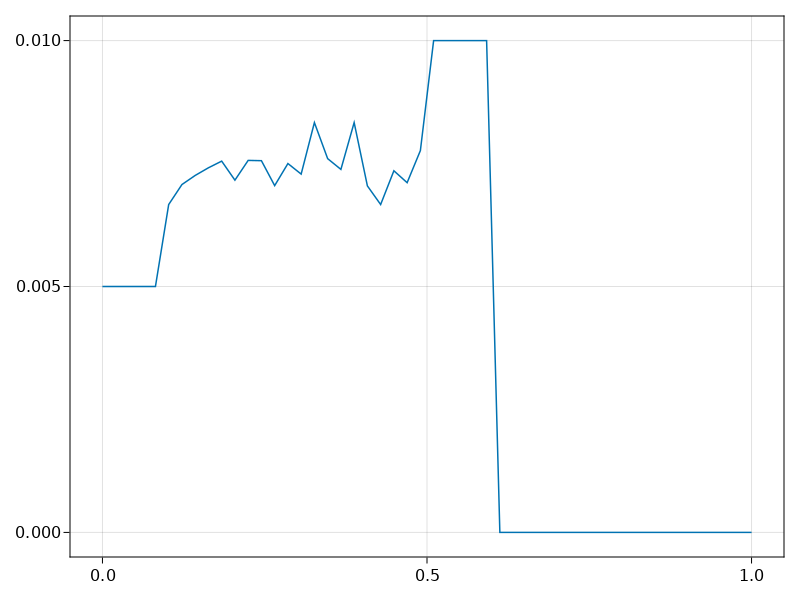

In [196]:
y = order(X,R,4*r)
lines(collect(0:(1.0/(length(y)-1)):1),y)

In [91]:
function order(X,R,step)
    c = zeros(Int(floor(1.0/step)))
    cnt = ones(size(c))
    y = 0.0
    n = 1
    while y < 1.0
        for i in 1:size(X,1)
            if y <= X[i,2] <= y+step
                c[n] += R[i]
                cnt[n] += 1
            end
        end
        n += 1
        y += step
    end
    return c./cnt
end

order (generic function with 2 methods)

σ (generic function with 2 methods)

0.039908853124240265